# Image Recognition with PCA - Lab

## Introduction

In this lab, you'll explore the classic MNIST dataset of handwritten digits. While not as large as the previous dataset on facial image recognition, it still provides a 64-dimensional dataset that is ripe for feature reduction.

## Objectives

In this lab you will: 

- Use PCA to discover the principal components with images 
- Use the principal components of  a dataset as features in a machine learning model 
- Calculate the time savings and performance gains of layering in PCA as a preprocessing step in machine learning pipelines 

## Load the data

Load the `load_digits` dataset from the `datasets` module of scikit-learn. 

In [1]:
# Load the dataset
from sklearn.datasets import load_digits
data = load_digits()
print(data.data.shape, data.target.shape)

(1797, 64) (1797,)


## Preview the dataset

Now that the dataset is loaded, display the first 20 images.

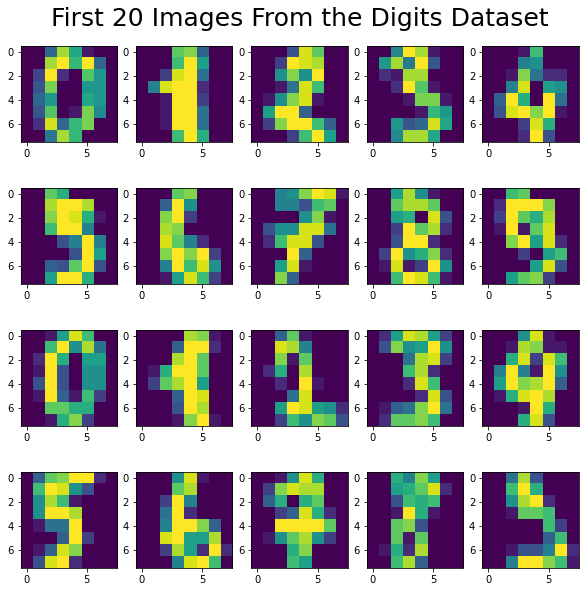

In [5]:
import matplotlib.pyplot as plt

# Display the first 20 images 
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10,10))

for n in range(20):
    i = n //5
    j = n%5
    ax = axes[i][j]
    ax.imshow(data.images[n])
    if n == 2:
        ax.set_title('First 20 Images From the Digits Dataset', 
                     fontsize=25, 
                     pad=20);

## Baseline model

Now it's time to fit an initial baseline model. 

- Split the data into training and test sets. Set `random_state=22` 
- Fit a support vector machine to the dataset. Set `gamma='auto'` 
- Record the training time 
- Print the training and test accucary of the model 

In [6]:
# Split the data
X = data.data
y = data.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=22)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1347, 64) (450, 64) (1347,) (450,)


In [7]:
# Fit a naive model 
from sklearn.svm import SVC
clf = SVC(gamma='auto')

%timeit clf.fit(X_train, y_train)

229 ms ± 2.82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
# Training and test accuracy
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
print('Training Accuracy: {}\nTesting Accuracy: {}'.format(train_acc, test_acc))

Training Accuracy: 1.0
Testing Accuracy: 0.58


### Grid search baseline

Refine the initial model by performing a grid search to tune the hyperparameters. The two most important parameters to adjust are `'C'` and `'gamma'`. Once again, be sure to record the training time as well as the training and test accuracy.

In [11]:
# Your code here
import numpy as np
from sklearn.model_selection import GridSearchCV

# ⏰ Your code may take several minutes to run
clf = SVC()

param_grid = {'C' : np.linspace(0.1, 10, num=11),
              'gamma' : np.linspace(10**-3, 5, num=11)}

grid_search = GridSearchCV(clf, param_grid, cv=5)

%timeit grid_search.fit(X_train, y_train)

1min 50s ± 3.52 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
# Print the best parameters 
grid_search.best_params_

{'C': 2.08, 'gamma': 0.001}

In [13]:
# Print the training and test accuracy 
train_acc = grid_search.score(X_train, y_train)
test_acc = grid_search.score(X_test, y_test)
print('Training Accuracy: {}\tTesting Accuracy: {}'.format(train_acc, test_acc))

Training Accuracy: 1.0	Testing Accuracy: 0.9911111111111112


In [14]:
train_acc = grid_search.best_estimator_.score(X_train, y_train)
test_acc = grid_search.best_estimator_.score(X_test, y_test)
print('Training Accuracy: {}\tTesting Accuracy: {}'.format(train_acc, test_acc))

Training Accuracy: 1.0	Testing Accuracy: 0.9911111111111112


## Compressing with PCA

Now that you've fit a baseline classifier, it's time to explore the impacts of using PCA as a preprocessing technique. To start, perform PCA on `X_train`. (Be sure to only fit PCA to `X_train`; you don't want to leak any information from the test set.) Also, don't reduce the number of features quite yet. You'll determine the number of features needed to account for 95% of the overall variance momentarily.

In [15]:
# Your code here
from sklearn.decomposition import PCA

pca = PCA()
fit_pca = pca.fit_transform(X_train)

## Plot the explained variance versus the number of features

In order to determine the number of features you wish to reduce the dataset to, it is sensible to plot the overall variance accounted for by the first $n$ principal components. Create a graph of the variance explained versus the number of principal components.

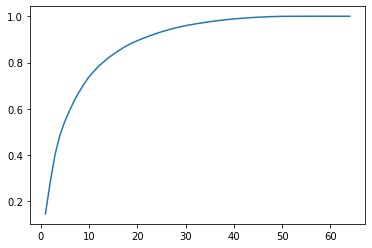

In [16]:
# Your code here
plt.plot(range(1,65), pca.explained_variance_ratio_.cumsum());

## Determine the number of features to capture 95% of the variance

Great! Now determine the number of features needed to capture 95% of the dataset's overall variance.

In [17]:
########################################################
# decomposing solution branch part 1
pca.explained_variance_ratio_.cumsum()

array([0.14605548, 0.2840424 , 0.40328439, 0.48588121, 0.54482708,
       0.59254309, 0.63688612, 0.67392093, 0.70754246, 0.7378943 ,
       0.76140563, 0.7838066 , 0.80211657, 0.81972732, 0.83481165,
       0.84905276, 0.86234996, 0.87479174, 0.88501678, 0.89409329,
       0.9027155 , 0.91080579, 0.9186102 , 0.9258521 , 0.93269945,
       0.93870564, 0.94454418, 0.94993516, 0.9549612 , 0.95931388,
       0.96305787, 0.96663758, 0.97002978, 0.97335256, 0.97638537,
       0.97923553, 0.98183484, 0.98416366, 0.98629722, 0.98837142,
       0.99024323, 0.99175882, 0.99324104, 0.99455328, 0.99577783,
       0.99684426, 0.99780785, 0.99853259, 0.99908847, 0.99952589,
       0.99976218, 0.99984492, 0.99991054, 0.99996973, 0.99998248,
       0.99998872, 0.99999415, 0.99999798, 0.99999925, 0.99999993,
       1.        , 1.        , 1.        , 1.        ])

In [18]:
# decomposing solution branch part 2
len(pca.explained_variance_ratio_.cumsum()) # this is the total number of features
# so to get the number of features with 95% or greater count number of feature that have .95 or greater

64

In [19]:
# how am I in phase 4 and didn't realize you can do this with an array
simple_array = np.array([1,2,3,4,5,6,7,8,9])
simple_array[simple_array <= 4]

array([1, 2, 3, 4])

In [20]:
# Your code here
total_explained_variance = pca.explained_variance_ratio_.cumsum()

# quantity that are over .95
variance_95_percent = len(total_explained_variance[total_explained_variance >= .95])
variance_95_percent

36

In [33]:
# finding the index of the first value that is equal or greater than .95 - part 1
n_to_reach_95 = X.shape[1] - variance_95_percent # 64 - 36
n_to_reach_95

28

In [40]:
# finding the index of the first value that is equal or greater than .95 - part 2
total_explained_variance[n_to_reach_95]

0.9549611953216074

In [42]:
# check 
pca_95_percent_variance_explained = PCA(n_components=29)

principleComponents = pca_95_percent_variance_explained.fit_transform(X_train)

print(np.sum(pca_95_percent_variance_explained.explained_variance_ratio_))

0.954956634787456


In [43]:
# check again
pca_95_percent_variance_explained = PCA(n_components=n_to_reach_95+1) # using found index plus 1

principleComponents = pca_95_percent_variance_explained.fit_transform(X_train)

print(np.sum(pca_95_percent_variance_explained.explained_variance_ratio_))

0.9549567898622345


In [44]:
########################################################

In [45]:
# start to finish

# instantiate
pca = PCA()

# fit and transform
fit_pca = pca.fit_transform(X_train)

# get index of the first value that is equal or greater than .95
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_95_or_over = len(total_explained_variance[total_explained_variance >= .95])
n_to_reach_95 = X_train.shape[1] - n_95_or_over

# the number of features needed to account for 95% of variance
n_components_needed = n_to_reach_95+1

n_components_needed

29

## Subset the dataset to these principal components which capture 95% of the overall variance

Use your knowledge to reproject the dataset into a lower-dimensional space using PCA. 

In [46]:
# Your code here
pca = PCA(n_components=n_components_needed)

pca_X_train = pca.fit_transform(X_train)

pca.explained_variance_ratio_.cumsum()[-1] # grab last value to see if .95 or greater

0.9549593147829336

## Refit a model on the compressed dataset

Now, refit a classification model to the compressed dataset. Be sure to time the required training time, as well as the test and training accuracy.

In [49]:
# Your code here
from sklearn.pipeline import Pipeline

SVC_pipe = Pipeline([('pca', PCA(n_components=n_components_needed)),
                     ('model', SVC(gamma='auto'))])

%timeit SVC_pipe.fit(X_train, y_train)

print(SVC_pipe.score(X_train, y_train))
print(SVC_pipe.score(X_test, y_test))

403 ms ± 9.29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.0
0.14888888888888888


In [55]:
# or solution branch way to refit a classification model to teh compressed dataset
X_pca_test = pca.transform(X_test)
clf = SVC(gamma='auto')
%timeit clf.fit(pca_X_train, y_train)
train_pca_acc = clf.score(pca_X_train, y_train)
test_pca_acc = clf.score(X_pca_test, y_test)
print('Training Accuracy: {}\tTesting Accuracy: {}'.format(train_pca_acc, test_pca_acc))

337 ms ± 22.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Training Accuracy: 1.0	Testing Accuracy: 0.14888888888888888


### Grid search

Finally, use grid search to find optimal hyperparameters for the classifier on the reduced dataset. Be sure to record the time required to fit the model, the optimal hyperparameters and the test and train accuracy of the resulting model.

In [58]:
# Your code here
# ⏰ Your code may take several minutes to run
SVC_pipe = Pipeline([('pca', PCA(n_components=n_components_needed)),
                     ('model', SVC(gamma='auto'))])


param_grid_dict = {'model__C' : np.linspace(.1, 10, num=11),
                   'model__gamma' : np.linspace(10**-3, 5, num=11)}


# Construct grid search
gs_pipe = GridSearchCV(estimator=SVC_pipe, 
                       param_grid=param_grid_dict, 
                       scoring='accuracy', 
                       cv=3)

# Fit using grid search
%timeit gs_pipe.fit(X_train, y_train)

1min 22s ± 1.62 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [59]:
# Print the best parameters 
gs_pipe.best_params_

{'model__C': 2.08, 'model__gamma': 0.001}

In [61]:
# Print the training and test accuracy 
train_acc = gs_pipe.score(X_train, y_train)
test_acc = gs_pipe.score(X_test, y_test)
print('Training Accuracy: {}\tTesting Accuracy: {}'.format(train_acc, test_acc))

Training Accuracy: 0.9992576095025983	Testing Accuracy: 0.9933333333333333


## Summary

Well done! In this lab, you employed PCA to reduce a high dimensional dataset. With this, you observed the potential cost benefits required to train a model and performance gains of the model itself.